In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gendat2_python import gendat2

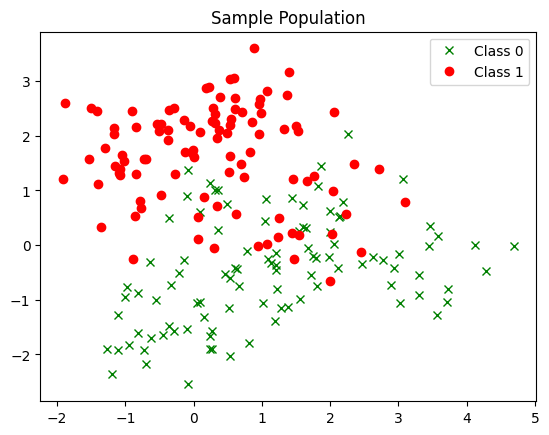

In [39]:
# loads the sample data where x0,y0 represents class 0 and x1,y1 represents class 1
x0, y0, x1, y1 = np.loadtxt('classasgntrain1.dat').T
N0 = x0.size
N1 = x1.size
N = N0 + N1
# this just plots the sample/given data
fig, ax = plt.subplots()
ax.plot(x0, y0, 'gx', label='Class 0')
ax.plot(x1, y1, 'ro', label='Class 1')
ax.legend()
plt.title("Sample Population")
plt.show()

In [58]:
x0, y0, x1, y1 = np.loadtxt('classasgntrain1.dat').T
# x0 = np.array([x0,y0])
# x1 = np.array([x1,y1])
print(f'x0: {x0.shape}')
print(f'x1: {x1.shape}')
print(f'N: {N}')

x0: (100,)
x1: (100,)
N: 200


In [74]:
# Build the X matrix
class_0_matrix = np.array([np.ones(N0), x0, y0]).T
class_1_matrix = np.array([np.ones(N1), x1, y1]).T
X_aug = np.concatenate((class_0_matrix, class_1_matrix), axis=0)
# Build the indicator response matrix 
Y0_array = np.array([np.ones(N0), np.zeros(N0)]).T
Y1_array = np.array([np.zeros(N1), np.ones(N1)]).T
Y = np.concatenate((Y0_array, Y1_array), axis=0)
# print(f'class_0_matrix: {class_0_matrix.shape}')
# print(f'class_1_matrix: {class_1_matrix.shape}')
print(f'X_aug: {X_aug.shape}')
print(f'Y: {Y.shape}')

X_aug: (200, 3)
Y: (200, 2)


In [81]:
# Find the parameter matrix
# Bhat = (X'*X) \ X'* Y;
Bhat = np.dot(np.dot(np.linalg.pinv(np.dot(X_aug.T, X_aug)), X_aug.T), Y)
# Find the approximate response
Yhat = np.dot(X_aug, Bhat)
Yhathard = Yhat > 0.5 # threshold into different classes
nerr = np.divide(np.sum(np.sum(np.absolute(Yhathard - Y))), 2); # count the total number of errors 
errrate_linregress_train = np.divide(nerr,N) 
print(f'Bhat: {Bhat.shape}')
print(f'Yhat: {Yhat.shape}')
print(f'errrate_linregress_train: {errrate_linregress_train}')


Bhat: (3, 2)
Yhat: (200, 2)
errrate_linregress_train: 0.145


In [100]:
# Now test on new (testing data)
Ntest0 = 5000 # number of class 0 points to generate
Ntest1 = 5000 # number of class 1 points to generate
xtest0 = gendat2(0,Ntest0) # generate the test data for class 0 
xtest1 = gendat2(1,Ntest1) # generate the test data for class 1 
nerr = 0
print(f'xtest0: {xtest0.shape}')
print(f'xtest1: {xtest1.shape}')

xtest0: (2, 5000)
xtest1: (2, 5000)


In [102]:
print(f'{xtest0[:,0]}')
for i in range(0, Ntest0):
    temp_var = xtest0[:,i]
    yhat = np.dot( np.array([1, temp_var.T]), Bhat)
    if yhat[0] > yhat[1]: # error: chose class 0 over class 1
        nerr += 1

[-0.25328709  1.40170061  0.35481814 ... -1.11658095  2.51233939
 -0.34415072]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.